In [1]:
from corsort import corsort, quicksort, entropy_bound, evaluate_comparisons
from matplotlib import pyplot as plt
import numpy as np
from multiprocess.pool import Pool
import dill as pickle

In [2]:
sort_list = [quicksort, corsort]
n_list = [2**i for i in range(3, 11)]
n_t = 10000

In [3]:
with Pool(24) as p:
    comparisons = evaluate_comparisons(n_list=n_list, sort_list=sort_list, nt=n_t, pool=p)

Evaluate quicksort for n = 8


100%|██████████| 10000/10000 [00:29<00:00, 336.49it/s]


Evaluate corsort for n = 8


100%|██████████| 10000/10000 [01:16<00:00, 131.58it/s]


Evaluate quicksort for n = 16


100%|██████████| 10000/10000 [00:24<00:00, 412.58it/s]


Evaluate corsort for n = 16


100%|██████████| 10000/10000 [01:09<00:00, 143.95it/s]


Evaluate quicksort for n = 32


100%|██████████| 10000/10000 [00:25<00:00, 391.52it/s]


Evaluate corsort for n = 32


100%|██████████| 10000/10000 [01:10<00:00, 142.69it/s]


Evaluate quicksort for n = 64


100%|██████████| 10000/10000 [00:24<00:00, 414.72it/s]


Evaluate corsort for n = 64


100%|██████████| 10000/10000 [01:15<00:00, 131.96it/s]


Evaluate quicksort for n = 128


100%|██████████| 10000/10000 [00:24<00:00, 412.95it/s]


Evaluate corsort for n = 128


100%|██████████| 10000/10000 [01:27<00:00, 114.92it/s]


Evaluate quicksort for n = 256


100%|██████████| 10000/10000 [00:27<00:00, 368.63it/s]


Evaluate corsort for n = 256


100%|██████████| 10000/10000 [04:05<00:00, 40.79it/s]


Evaluate quicksort for n = 512


100%|██████████| 10000/10000 [00:26<00:00, 371.98it/s]


Evaluate corsort for n = 512


100%|██████████| 10000/10000 [36:09<00:00,  4.61it/s] 


Evaluate quicksort for n = 1024


100%|██████████| 10000/10000 [00:30<00:00, 324.81it/s]


Evaluate corsort for n = 1024


 34%|███▍      | 3427/10000 [1:57:10<3:45:41,  2.06s/it] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
with open(f'comparisons_{n_t}.pkl', 'wb') as f:
    pickle.dump(comparisons, f)

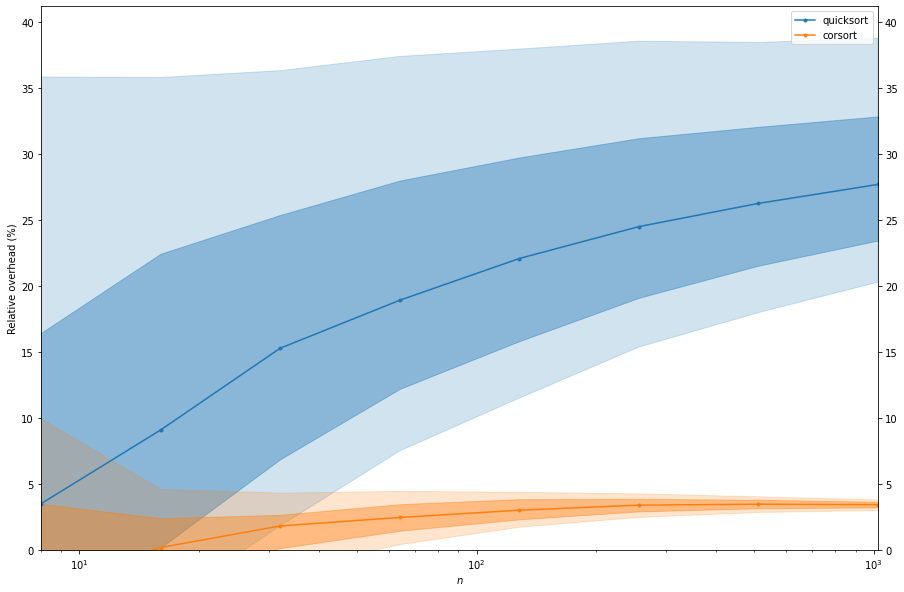

In [15]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_xscale("log")

for color, ns in zip(colors, comparisons.items()):
    name, stats = ns
    n_list = [n for n in stats]
    bounds = np.array([entropy_bound(n) for n in n_list])
    times = stats.values()
    q = np.zeros((5, len(times)), dtype=int)
    for i, per in enumerate([10, 25, 50, 75, 90]):
        for j, s in enumerate(times):
            q[i, j] = np.percentile(s, per)
    q = 100*(q/bounds-1)
    ax.plot(n_list, q[2, :], marker='.', label=name, color=color)
    ax.fill_between(n_list, q[1, :], q[3, :], alpha=.4, color=color)
    ax.fill_between(n_list, q[0, :], q[4, :], alpha=.2, color=color)

ax.legend()
ax.tick_params(labelright=True, right=True)
plt.ylabel('Relative overhead (%)')
plt.xlabel('$n$')
plt.ylim([0, None])
plt.xlim([8, 1024])
plt.show()